In [1]:

####################################################################################################
####################################################################################################

import datetime
import sys
import glob
import os.path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

from IPython.display import display
#from IPython.display import Image
from PIL import Image

#
import keras
from keras import backend as K
from keras import layers
from keras import regularizers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
from keras.models import Sequential
from keras.utils import plot_model

sys.path.append(os.path.abspath("../../"))
sys.path.append(os.path.abspath("../../pax_utils"))
from s1s2_utils import *

from model_xy_s2waveforms_dnn import *



Using TensorFlow backend.


In [2]:

####################################################################################################
####################################################################################################
    
nEventsTrain    = 10000
resample_factor = 229
s2_window_max   = 2290
n_timesteps     = int(s2_window_max / resample_factor)

file_out_input = 'train/array_train_input_events%06d_resample%04d' % (nEventsTrain, resample_factor)
file_out_truth = 'train/array_train_truth_events%06d_resample%04d' % (nEventsTrain, resample_factor)

train_data  = np.load(file_out_input + '.npy')
train_truth = np.load(file_out_truth + '.npy')

print(train_data.shape)
print(train_truth.shape)



(10000, 1270)
(10000, 2)


In [3]:

####################################################################################################
####################################################################################################

n_events     = nEventsTrain
n_channels   = 127
n_outputs    = 2

#n_timesteps  = 1

go_backwards = False
unroll       = False


####################################################################################################
# Training Data
####################################################################################################

#train_data  = np.random.random( (n_events, n_timesteps, n_channels) )
#train_truth = np.random.random( (n_events, n_outputs)               )

print()
print("Channels:         " + str(n_channels))
print("Timesteps:        " + str(n_timesteps))
print("Outputs:          " + str(n_outputs) )
print("Input data shape: " + str(train_data.shape ))
print("Truth data shape: " + str(train_truth.shape))
print()




Channels:         127
Timesteps:        10
Outputs:          2
Input data shape: (10000, 1270)
Truth data shape: (10000, 2)




Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1270)              1614170   
_________________________________________________________________
dense_2 (Dense)              (None, 1270)              1614170   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1270)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 635)               807085    
_________________________________________________________________
dropout_2 (Dropout)          (None, 635)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 317)               201612    
_________________________________________________________________
dropout_3 (Dropout)          (None, 317)               0    

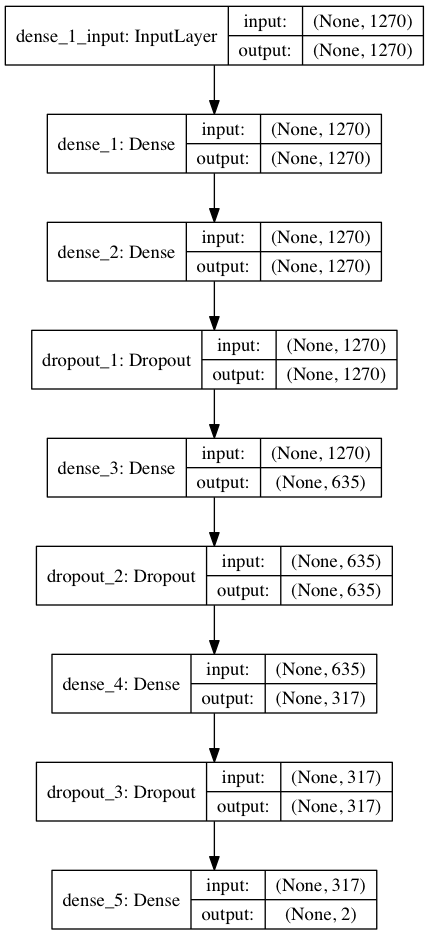

In [4]:

####################################################################################################
####################################################################################################

model, name = dnnModel(n_channels, n_timesteps, n_outputs, 'elu', 0.00005)
#model, name = dnnModel_s2integrals('elu', 0.00005)


######################################################################################
######################################################################################

name_png = 'models/' + name + ".png"
name_h5  = 'models/' + name + ".h5"

plot_model(model, to_file=name_png, show_layer_names=True, show_shapes=True)
  
print()
print("Model Summary:")
model.summary()
print()
display(Image.open(name_png))
print()



In [5]:

######################################################################################
######################################################################################

model.fit(
    train_data,
    train_truth,
    batch_size=64,
    epochs=10,
    verbose=True
)

print("Training Complete.")


Epoch 1/10
10000/10000 [==============================] - 67s 7ms/step - loss: 21.6978
Epoch 2/10
10000/10000 [==============================] - 64s 6ms/step - loss: 5.1186
Epoch 3/10
10000/10000 [==============================] - 63s 6ms/step - loss: 4.1992
Epoch 4/10
10000/10000 [==============================] - 63s 6ms/step - loss: 4.0896
Epoch 5/10
10000/10000 [==============================] - 66s 7ms/step - loss: 4.0495
Epoch 6/10
10000/10000 [==============================] - 69s 7ms/step - loss: 3.6861
Epoch 7/10
10000/10000 [==============================] - 72s 7ms/step - loss: 3.6226
Epoch 8/10
10000/10000 [==============================] - 66s 7ms/step - loss: 3.3448
Epoch 9/10
10000/10000 [==============================] - 66s 7ms/step - loss: 3.3971
Epoch 10/10
10000/10000 [==============================] - 65s 7ms/step - loss: 3.2204
Training Complete.


In [6]:

######################################################################################
# Save Model
######################################################################################

folder  = "models/"    
name_h5 = folder + name + ".h5"
print(name_h5)

model.save(name_h5, overwrite=True)



models/model_xy_s2waveforms_dnn_elu.h5
